# Importing Needed Packages

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

# Reading CSV file as weather_df and making date_time column as index of dataframe

In [3]:
df = pd.read_csv("/Users/dani-myburgh/Downloads/weatherdata_cleaned_dataset.csv")
df.head()

,Date,Year,Month,Month_Name,Min Temperature(°C),Max Temperature(°C),Average Temperature(°C),Precipitation(mm),Wind(km/h),Relative Humidity,Solar(W/m²)
0,1979-01-01,1979,1,January,25.154,28.419,26.786,13.125,6.932,0.824,21.584
1,1979-01-02,1979,1,January,24.853,27.973,26.413,23.355,6.081,0.870,19.647
2,1979-01-03,1979,1,January,25.469,27.772,26.620,39.468,6.015,0.874,23.400
3,1979-01-04,1979,1,January,24.851,26.534,25.692,23.830,6.422,0.886,13.279
4,1979-01-05,1979,1,January,24.974,28.343,26.658,9.089,6.162,0.844,24.058


# Checking columns in our dataframe

In [4]:
weather_df = pd.read_csv("/Users/dani-myburgh/Downloads/weatherdata_cleaned_dataset.csv")
weather_df.head(5)

,Date,Year,Month,Month_Name,Min Temperature(°C),Max Temperature(°C),Average Temperature(°C),Precipitation(mm),Wind(km/h),Relative Humidity,Solar(W/m²)
0,1979-01-01,1979,1,January,25.154,28.419,26.786,13.125,6.932,0.824,21.584
1,1979-01-02,1979,1,January,24.853,27.973,26.413,23.355,6.081,0.870,19.647
2,1979-01-03,1979,1,January,25.469,27.772,26.620,39.468,6.015,0.874,23.400
3,1979-01-04,1979,1,January,24.851,26.534,25.692,23.830,6.422,0.886,13.279
4,1979-01-05,1979,1,January,24.974,28.343,26.658,9.089,6.162,0.844,24.058


## Now shape

In [5]:
weather_df.shape

(12868, 11)

In [6]:
weather_df.describe()

,Year,Month,Min Temperature(°C),Max Temperature(°C),Average Temperature(°C),Precipitation(mm),Wind(km/h),Relative Humidity,Solar(W/m²)
count,12868.000000,12868.000000,12868.000000,12868.000000,12868.000000,12868.000000,12868.000000,12868.000000,12868.000000
mean,1996.351337,6.500933,24.548243,30.934948,27.741597,4.676026,4.248922,0.710181,21.488148
std,10.286102,3.436293,1.697789,2.895850,1.701524,10.363322,1.757652,0.087247,6.455624
min,1979.000000,1.000000,15.399000,22.082000,21.376000,0.000000,0.597000,0.404000,0.000000
25%,1987.000000,4.000000,23.539000,29.029750,26.644750,0.000000,2.847000,0.643000,18.668750
50%,1996.000000,7.000000,24.773000,30.557000,27.734500,0.283000,4.275500,0.706000,23.039000
75%,2005.000000,9.000000,25.650000,32.660000,28.816500,5.006000,5.436250,0.776000,26.708250
max,2014.000000,12.000000,29.645000,44.570000,34.746000,225.427000,17.281000,0.942000,29.688000


# Checking is there any null values in dataset

In [7]:
weather_df.isnull().any()

Date                       False
Year                       False
Month                      False
Month_Name                 False
Min Temperature(°C)        False
Max Temperature(°C)        False
Average Temperature(°C)    False
Precipitation(mm)          False
Wind(km/h)                 False
Relative Humidity          False
Solar(W/m²)                False
dtype: bool

### Now lets separate the feature (i.e. temperature) to be predicted from the rest of the featured. weather_x stores the rest of the dataset while weather_y has temperature column.

In [8]:
# === Harmonise to your dataset columns & build numeric feature frame ===


# Map your CSV column names to generic names used later in the notebook
_rename_map = {
    'Max Temperature(°C)': 'maxtempC',
    'Min Temperature(°C)': 'mintempC',
    'Average Temperature(°C)': 'tempC',
    'Precipitation(mm)': 'precipMM',
    'Wind(km/h)': 'windspeedKmph',
    'Relative Humidity': 'humidity',
    'Solar(W/m²)': 'solar_w_m2',  # proxy feature for solar exposure
}
weather_df = weather_df.rename(columns=_rename_map)

# Optionally compute HeatIndexC if we have temperature (°C) and humidity (%)
if {'tempC', 'humidity'}.issubset(weather_df.columns):
    T_C = weather_df['tempC']
    R = weather_df['humidity']
    T_F = T_C * 9.0/5.0 + 32.0
    HI_F = (-42.379 + 2.04901523*T_F + 10.14333127*R - 0.22475541*T_F*R
            - 6.83783e-3*(T_F**2) - 5.481717e-2*(R**2)
            + 1.22874e-3*(T_F**2)*R + 8.5282e-4*T_F*(R**2)
            - 1.99e-6*(T_F**2)*(R**2))
    weather_df['HeatIndexC'] = (HI_F - 32.0) * 5.0/9.0

# Build the numeric dataframe using columns available in your CSV
_wanted = ['maxtempC','mintempC','humidity','tempC','precipMM','windspeedKmph','solar_w_m2','HeatIndexC']
_available = [c for c in _wanted if c in weather_df.columns]
_missing = [c for c in _wanted if c not in weather_df.columns]

weather_df_num = weather_df.loc[:, _available]

if _missing:
    print("Skipped missing columns (not present in this dataset):", _missing)

weather_df_num.head()


,maxtempC,mintempC,humidity,tempC,precipMM,windspeedKmph,solar_w_m2,HeatIndexC
0,28.419,25.154,0.824,26.786,13.125,6.932,21.584,25.557014
1,27.973,24.853,0.870,26.413,23.355,6.081,19.647,25.209846
2,27.772,25.469,0.874,26.620,39.468,6.015,23.400,25.403249
3,26.534,24.851,0.886,25.692,23.830,6.422,13.279,24.530197
4,28.343,24.974,0.844,26.658,9.089,6.162,24.058,25.438166


# Shape of new dataframe

In [9]:
weather_df_num.shape

(12868, 8)

# Columns in new dataframe

In [10]:
weather_df_num.columns

Index(['maxtempC', 'mintempC', 'humidity', 'tempC', 'precipMM',
       'windspeedKmph', 'solar_w_m2', 'HeatIndexC'],
      dtype='object')

## Ploting all the column values

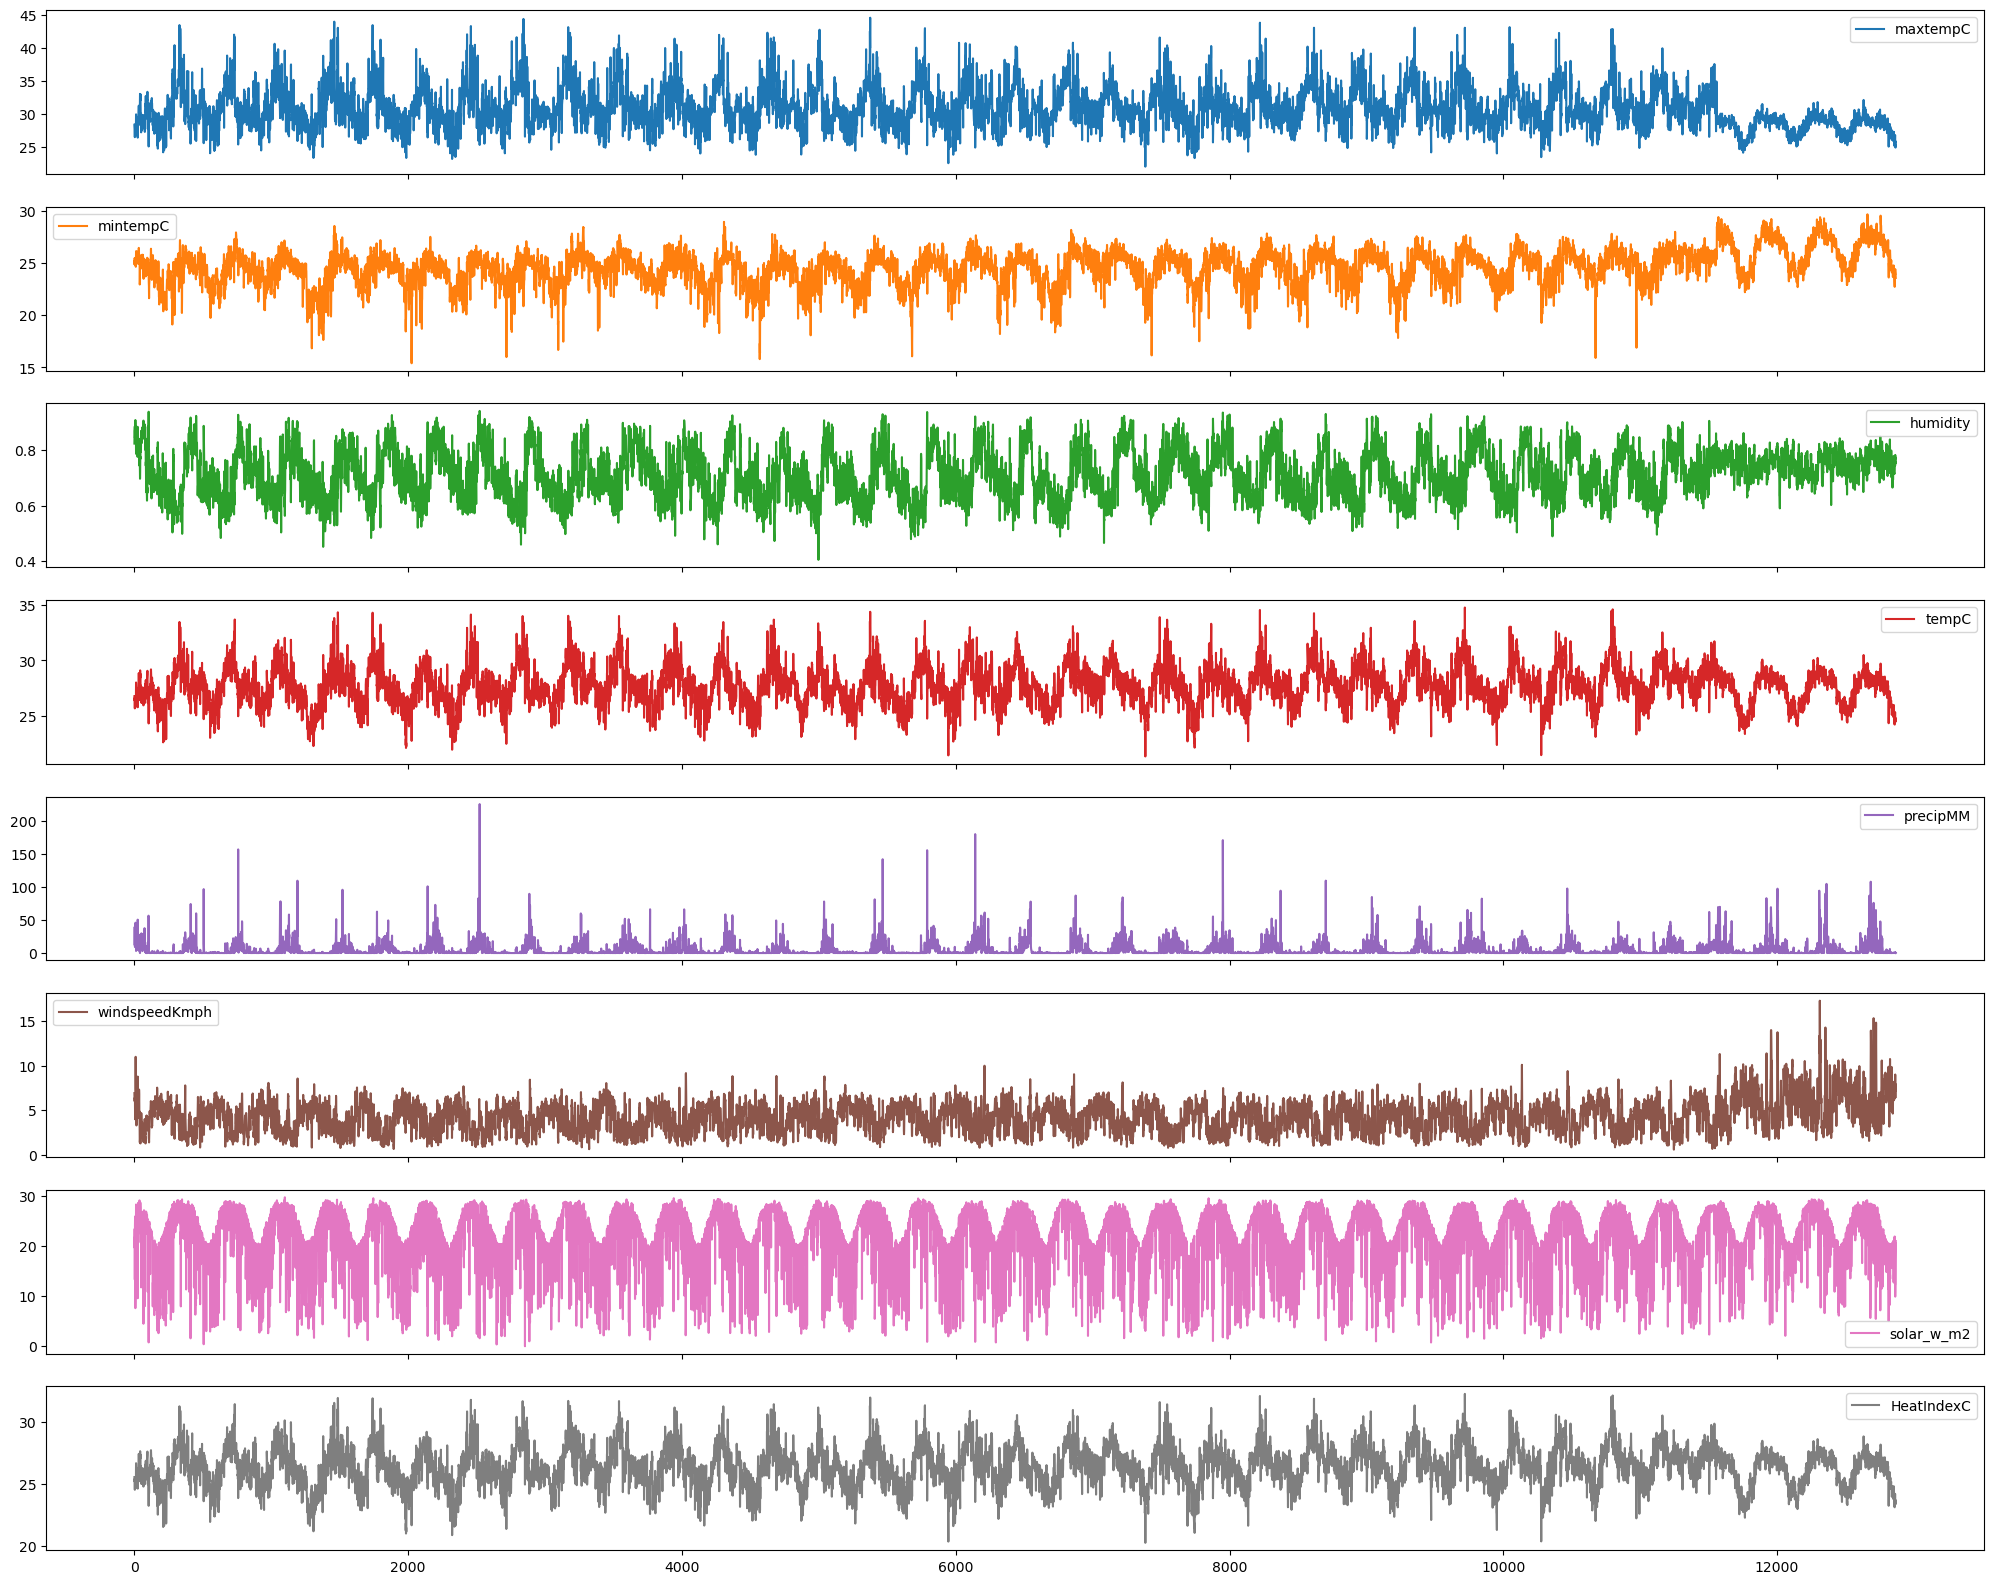

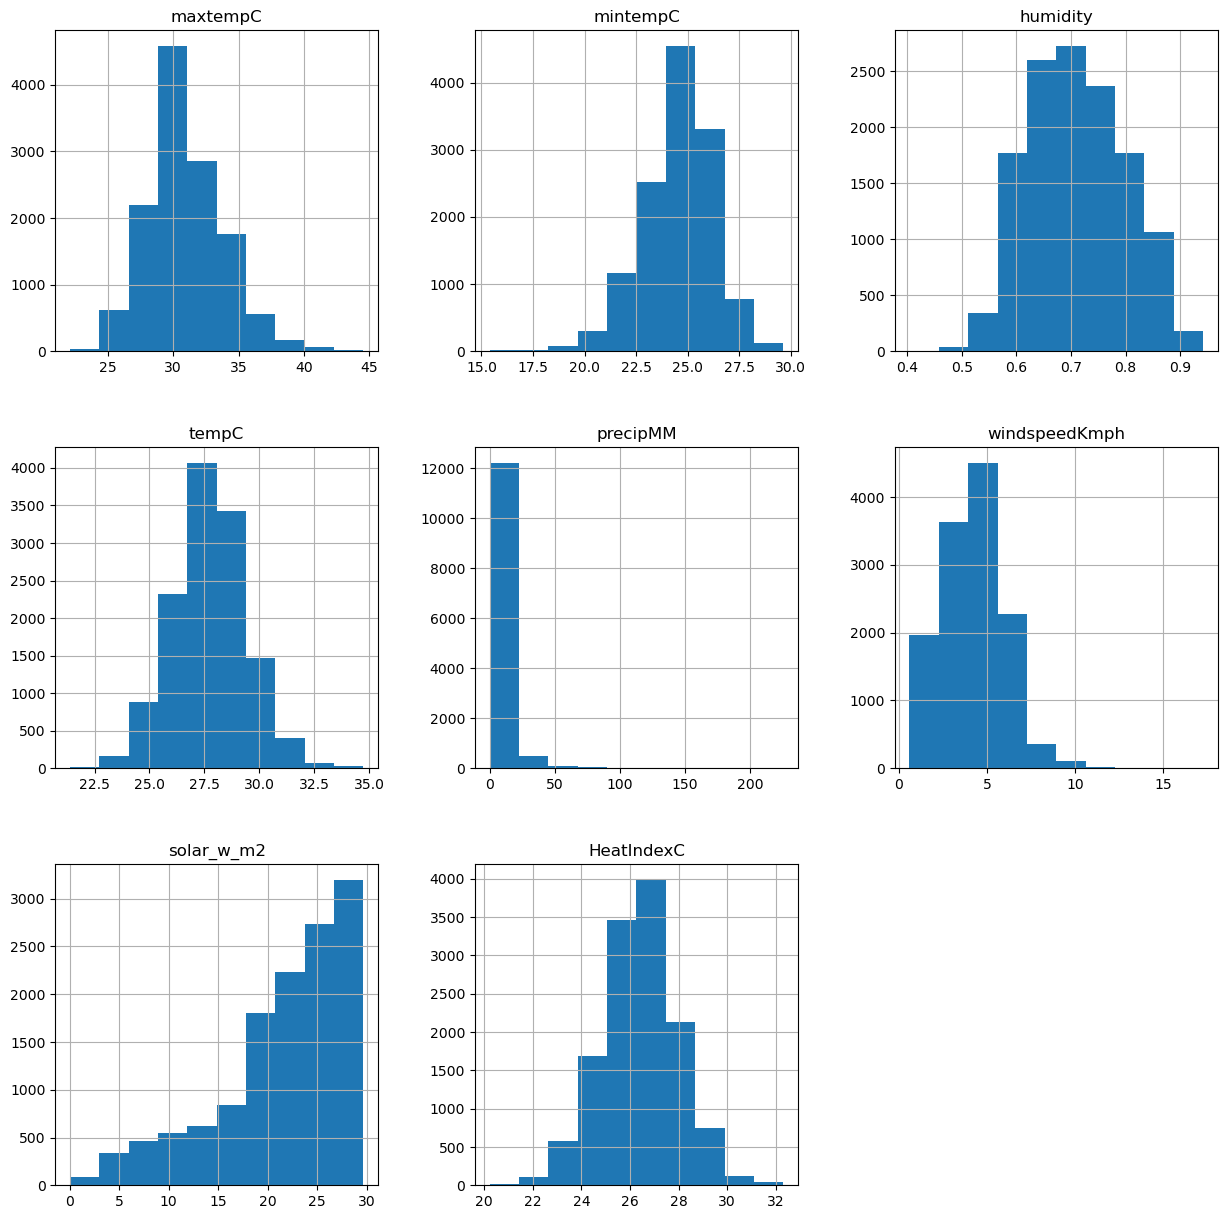

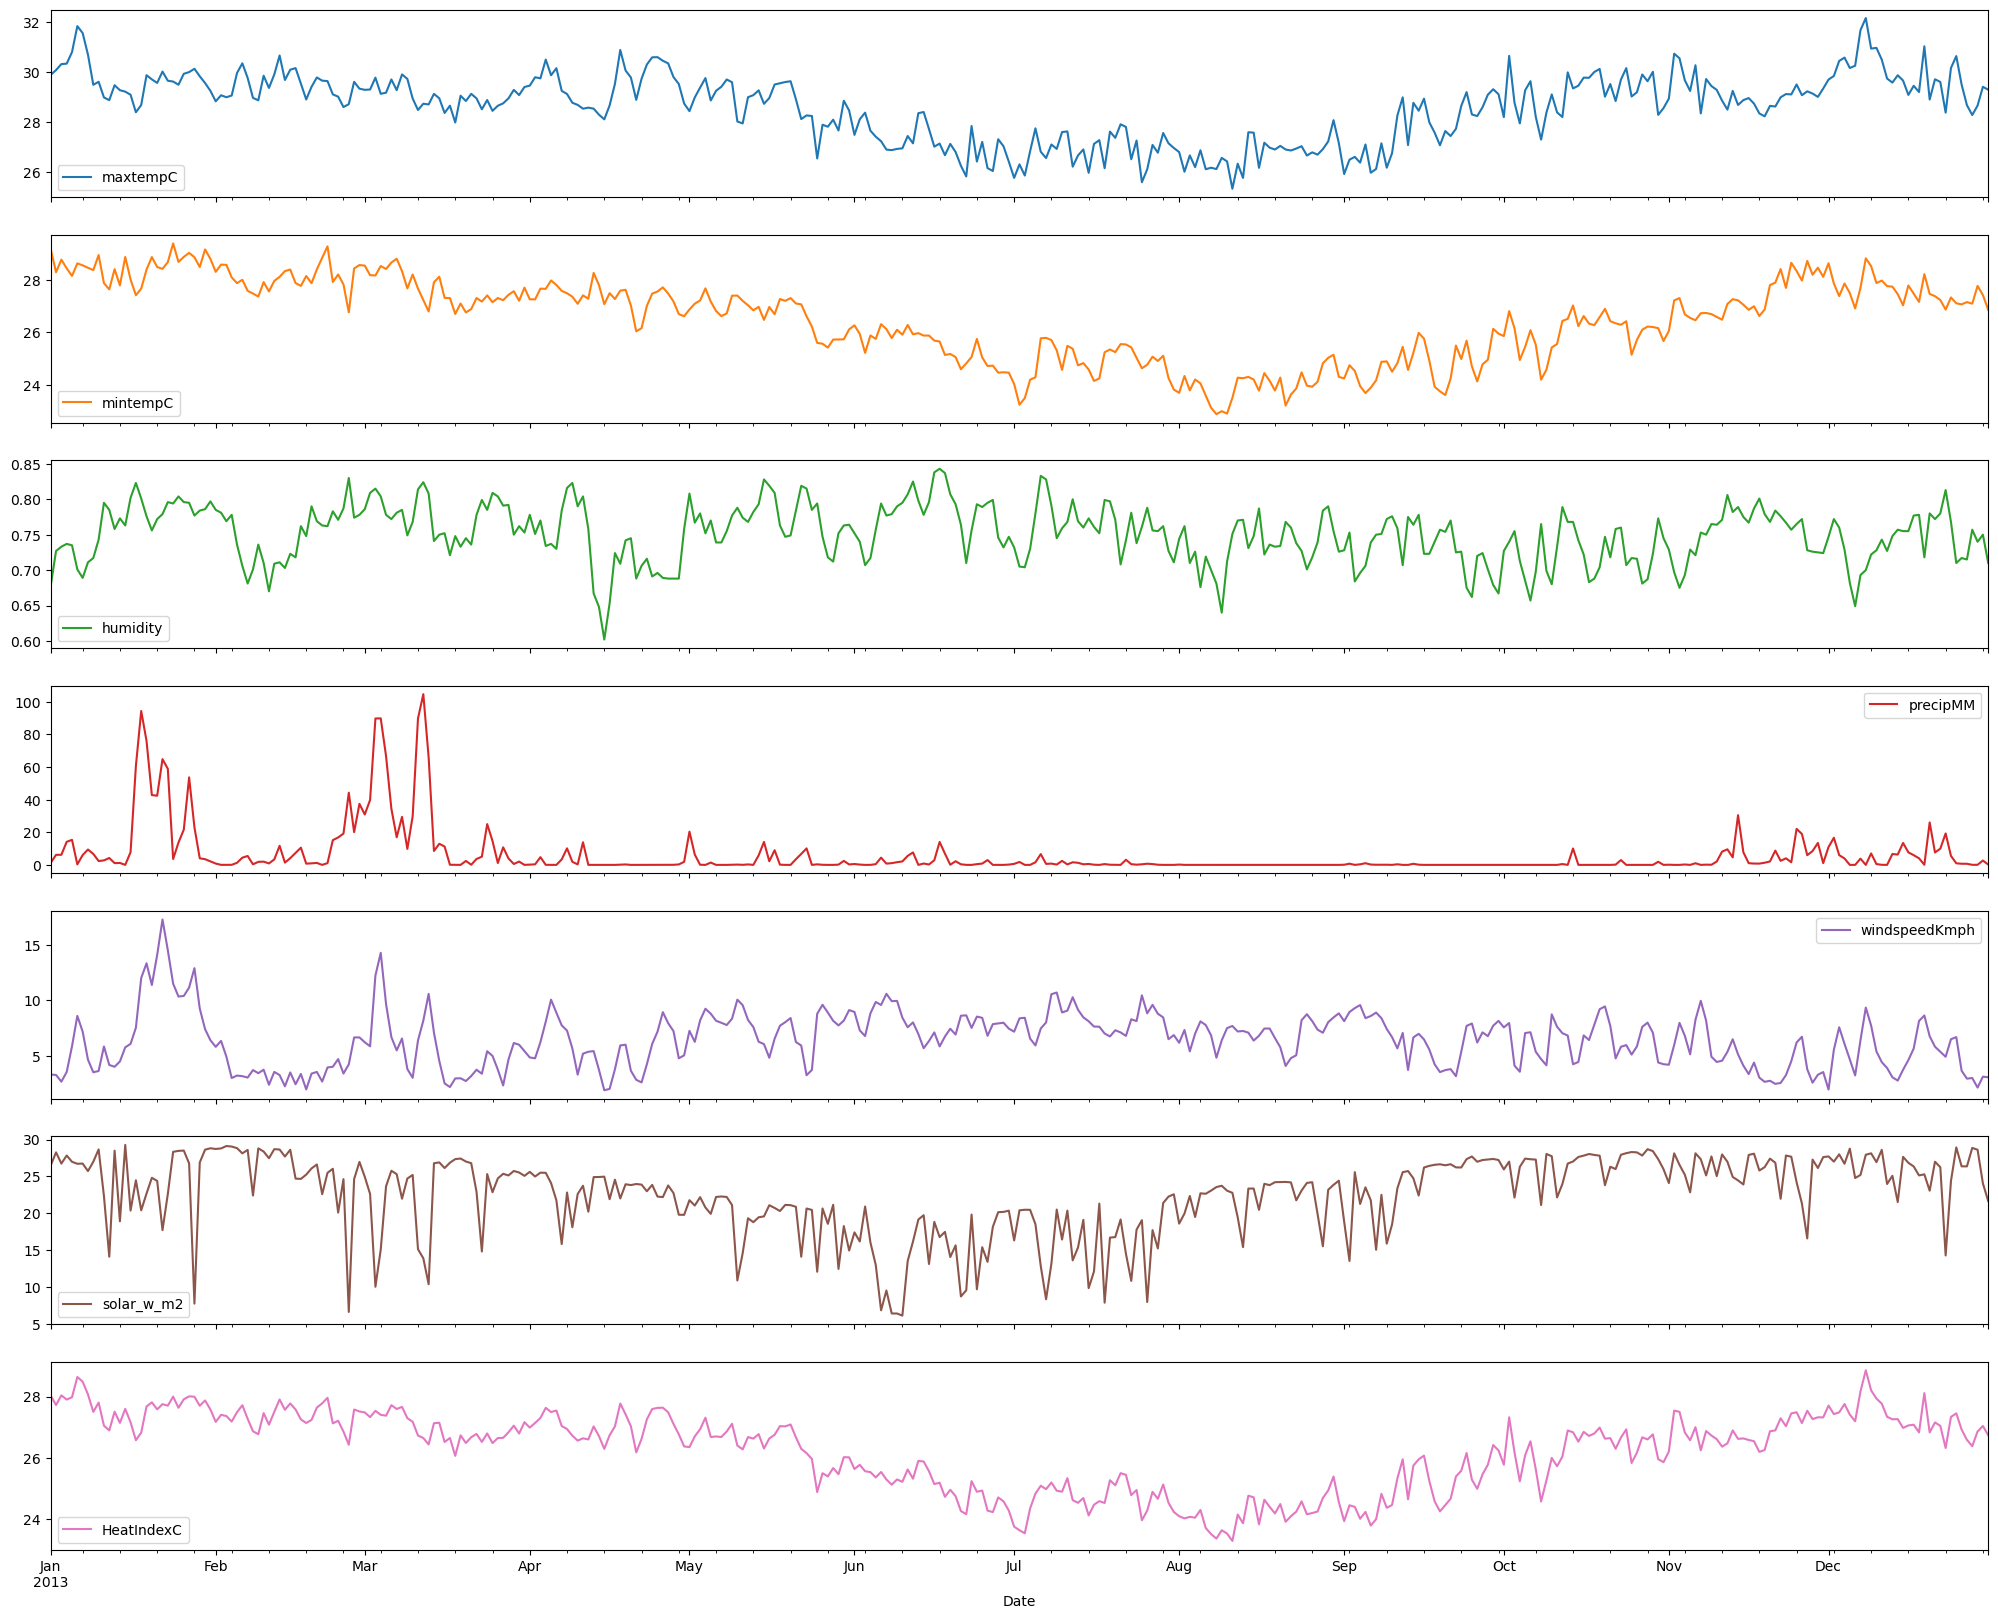

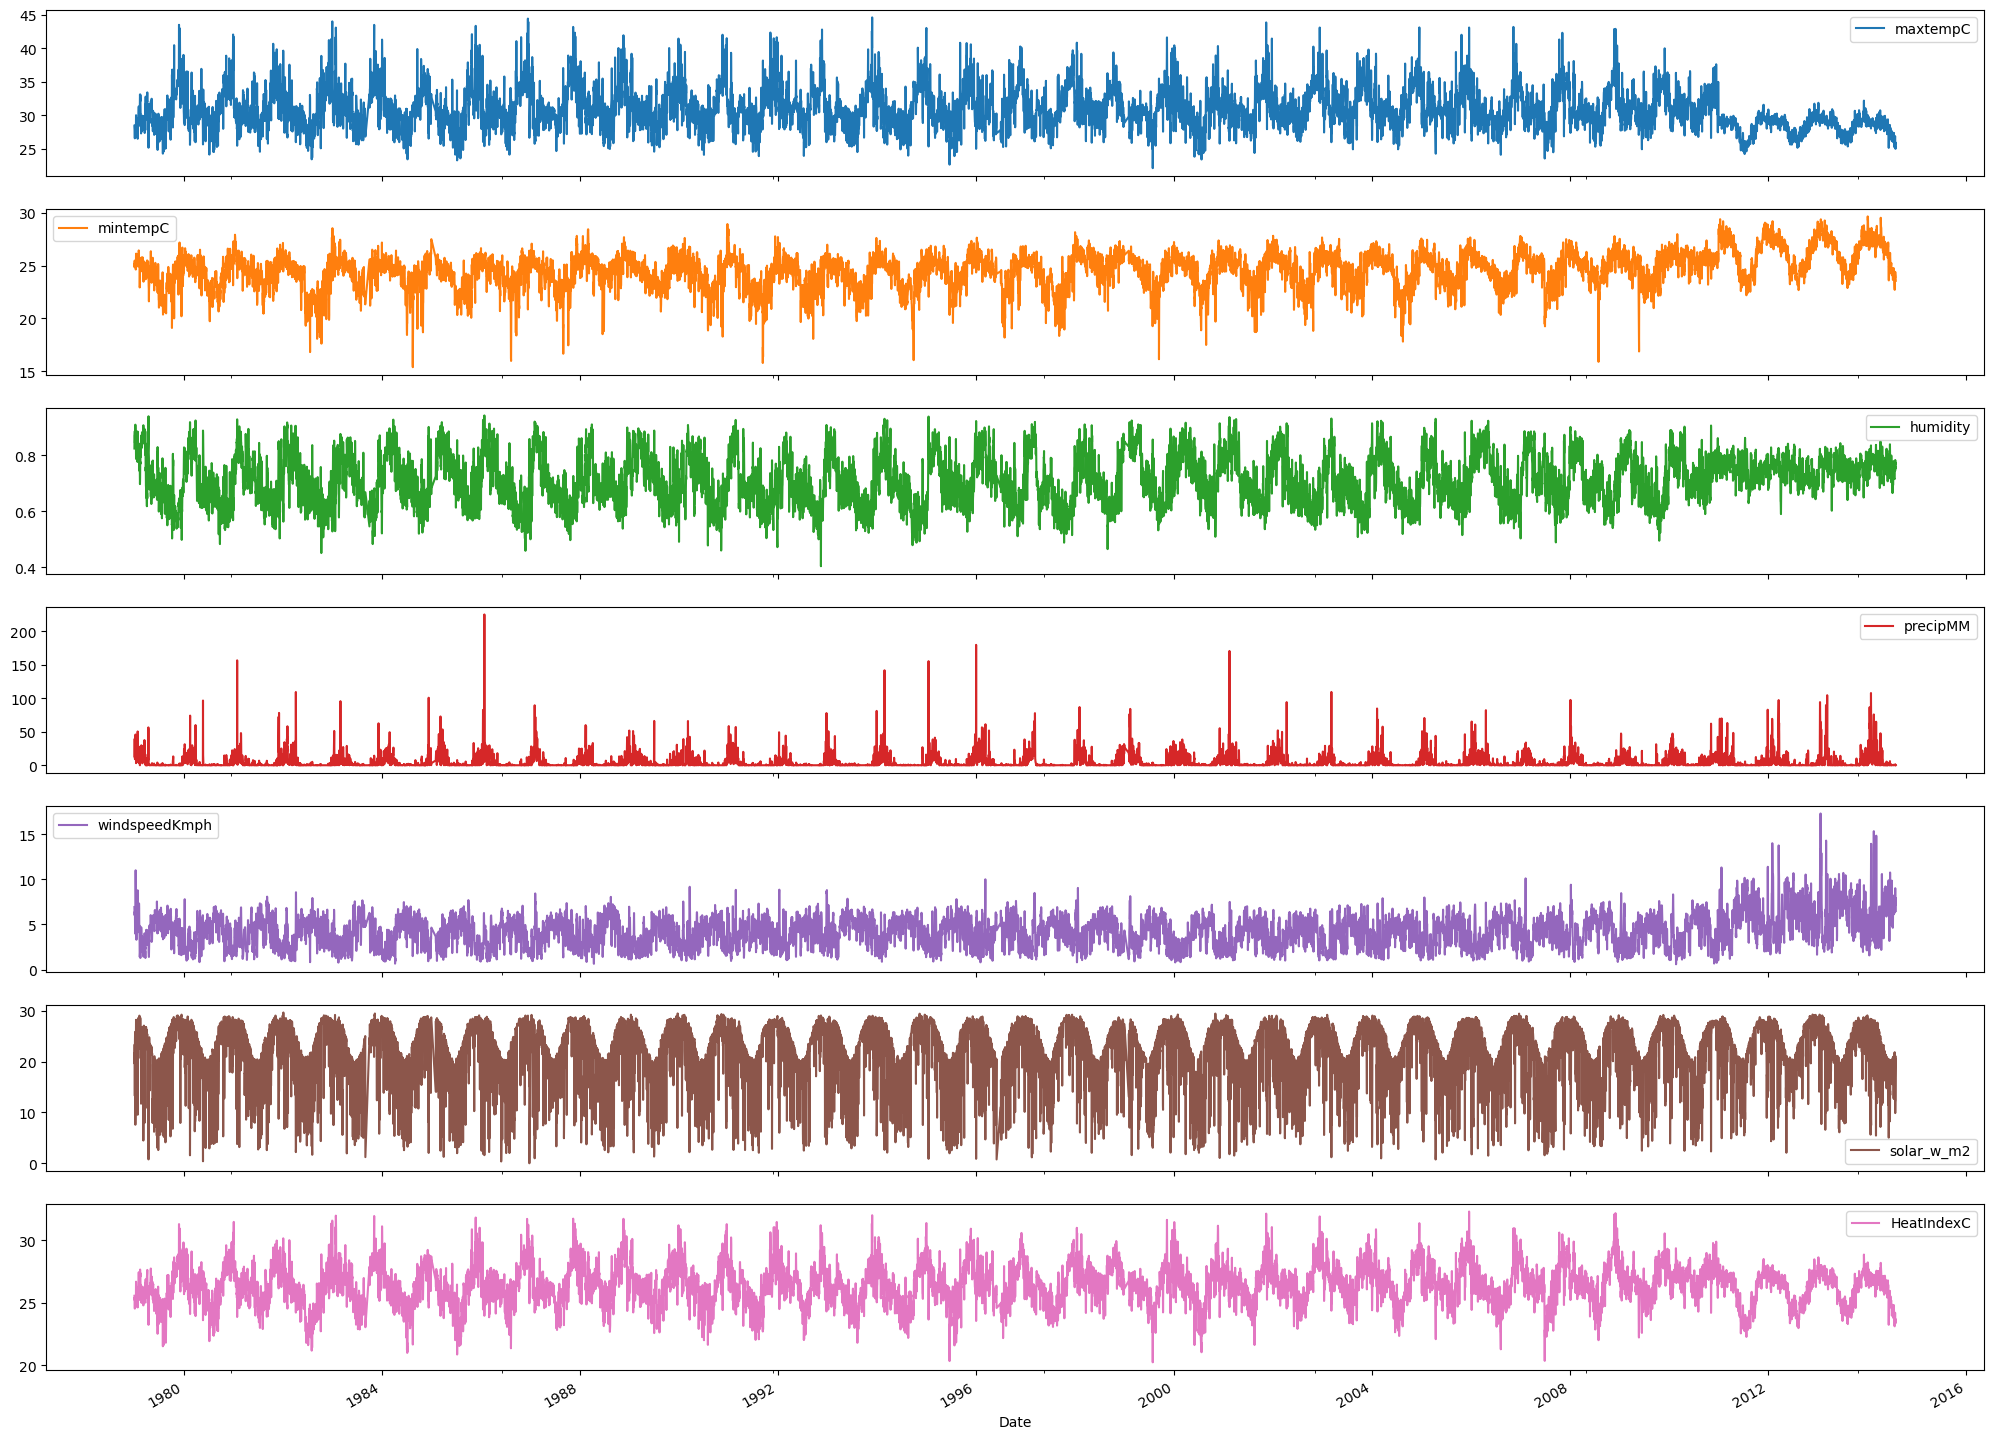

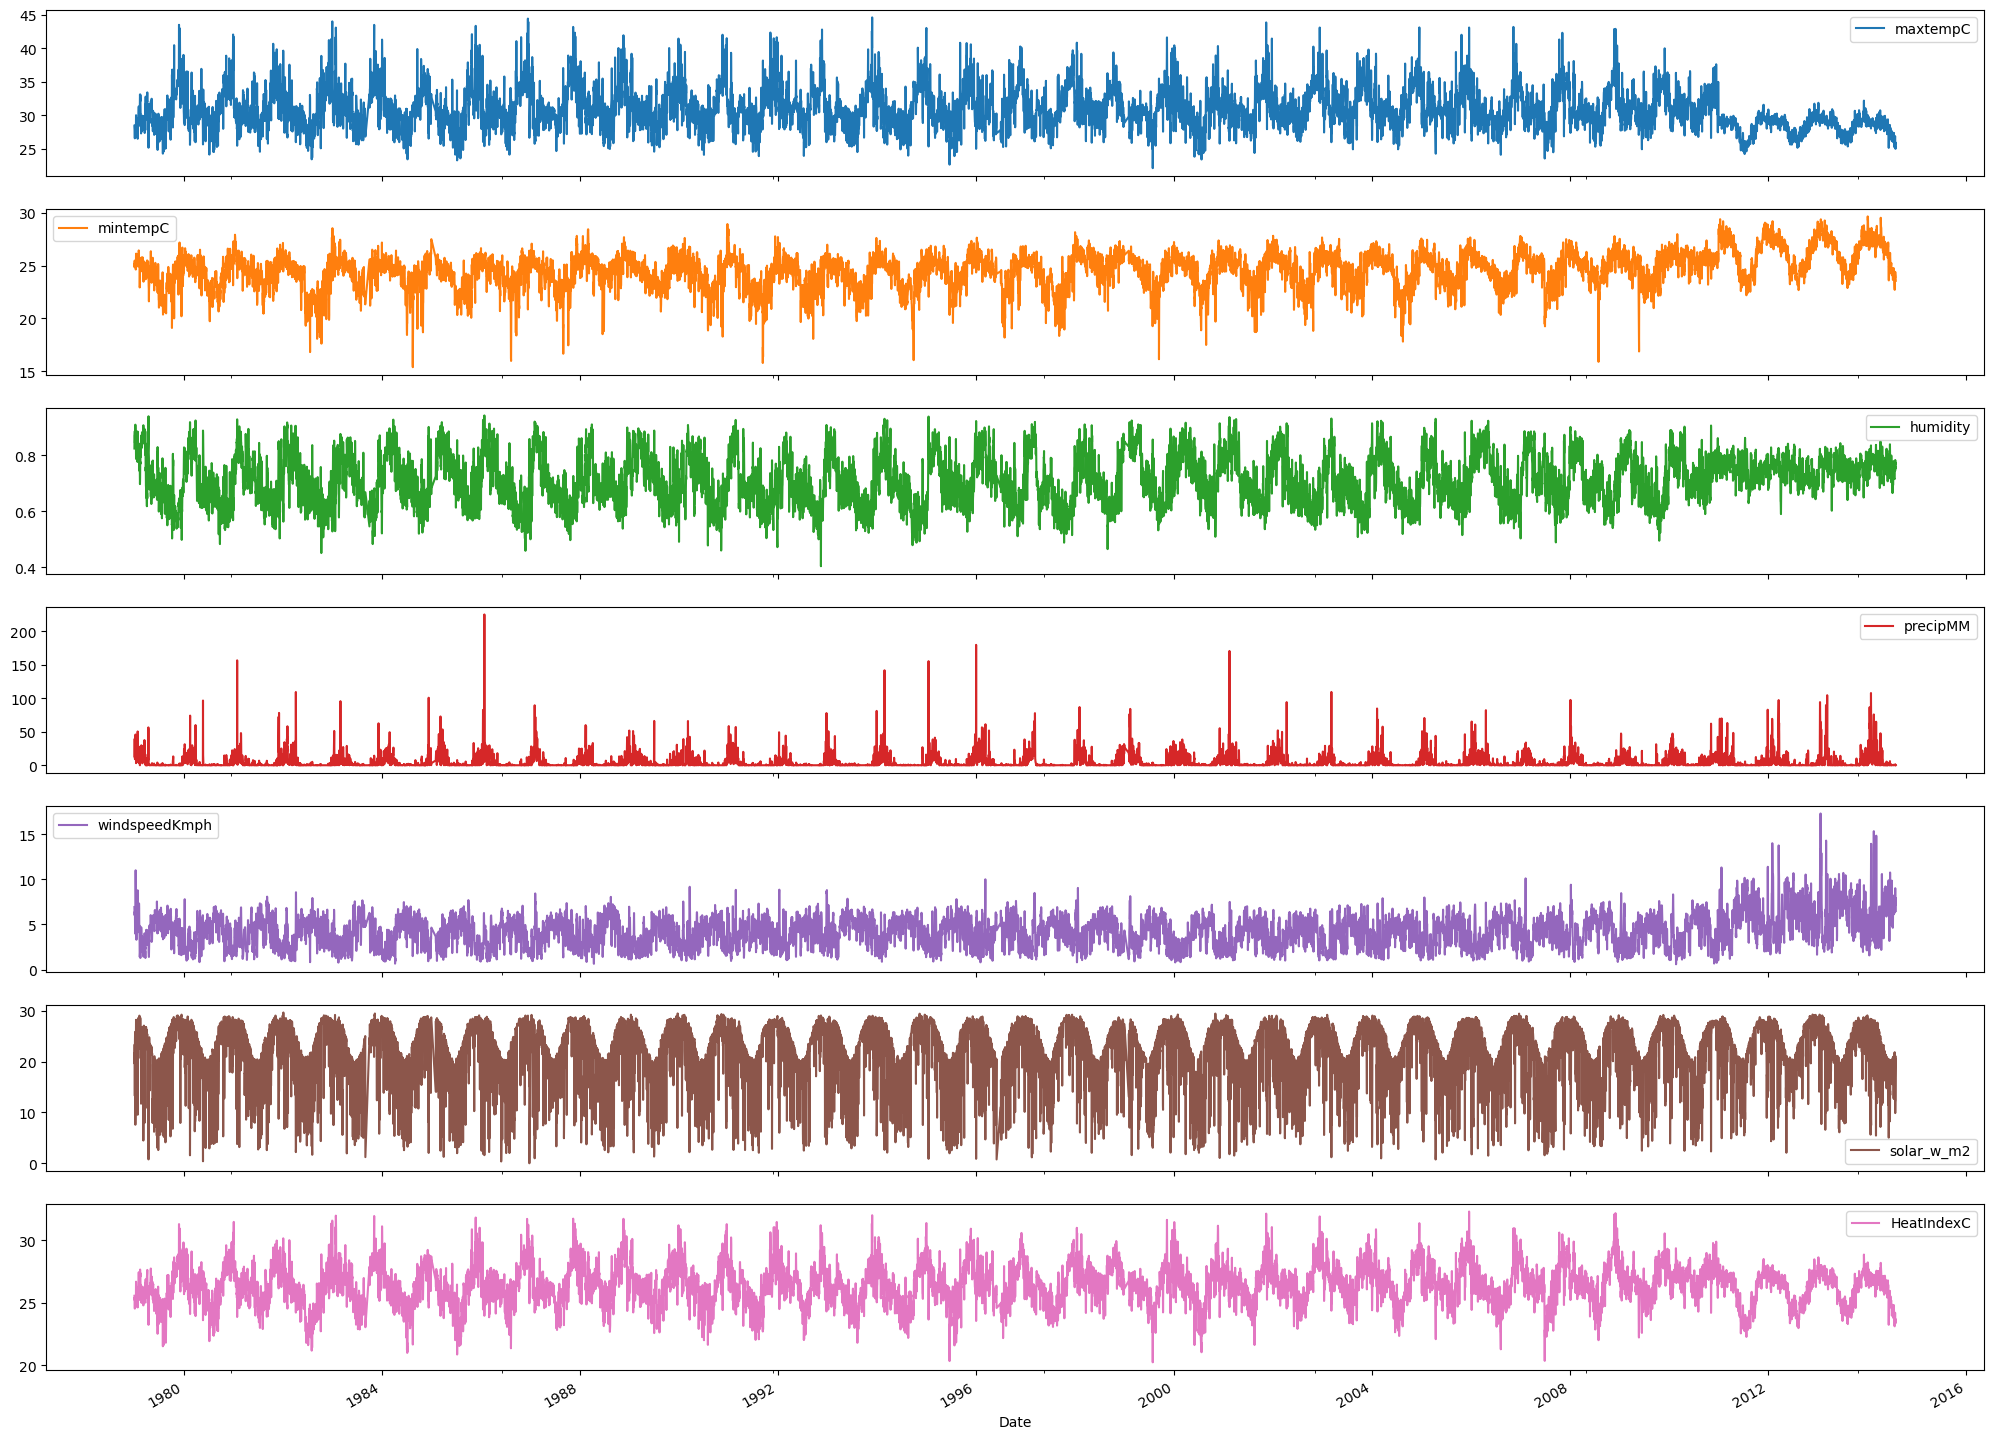

In [30]:
import matplotlib.pyplot as plt

weather_df_num.plot(subplots=True, figsize=(25,20))
plt.show()


# Ploting all the column values for 1 year

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

def ensure_datetime_index(num_df: pd.DataFrame,
                          base_df: pd.DataFrame | None = None,
                          date_col: str = "Date") -> pd.DataFrame:
    """
    Returns a copy of num_df indexed by a datetime column.
    If date_col is missing in num_df but present in base_df, it will left-join it in.
    """
    df = num_df.copy()

    if date_col not in df.columns:
        if base_df is not None and date_col in base_df.columns:
            df = base_df[[date_col]].join(df, how="left")
        else:
            raise ValueError(f"'{date_col}' not in numeric frame and no base_df provided.")

    # Coerce, drop invalid, sort, set index
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
    df = df.dropna(subset=[date_col]).set_index(date_col).sort_index()

    return df


def plot_year_range(num_df: pd.DataFrame,
                    start_year: int | None = None,
                    end_year: int | None = None,
                    freq: str = "D",
                    base_df: pd.DataFrame | None = None,
                    figsize: tuple[int, int] = (20, 12),
                    cols: list[str] | None = None,
                    grid_cols: int = 3,
                    sharex: bool = True,
                    tight_layout: bool = True,
                    return_axes: bool = False):
    """
    Plots numeric columns over a year range with resampling and a grid of subplots.

    freq examples: 'D', 'W', 'M'
    cols: optional list of columns to plot, else uses all numeric columns.
    """

    df_idx = ensure_datetime_index(num_df, base_df=base_df, date_col="Date")

    years_available = sorted(df_idx.index.year.unique().tolist())
    if not years_available:
        raise ValueError("No datetimes available to plot.")

    if start_year is None:
        start_year = years_available[0]
    if end_year is None:
        end_year = start_year

    # Slice inclusive within the year range
    sliced = df_idx.loc[f"{start_year}-01-01": f"{end_year}-12-31"]
    if sliced.empty:
        raise ValueError(f"No rows in the requested range. Available years: {years_available}")

    # Choose columns
    data = sliced.select_dtypes(include="number")
    if cols is not None:
        missing = [c for c in cols if c not in data.columns]
        if missing:
            raise ValueError(f"Columns not found: {missing}")
        data = data[cols]

    # Resample and forward fill
    data = data.resample(freq).mean().ffill()

    # Grid layout
    n = data.shape[1]
    if n == 0:
        raise ValueError("No numeric columns found to plot.")
    grid_cols = max(1, int(grid_cols))
    grid_rows = ceil(n / grid_cols)

    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=figsize, sharex=sharex)
    axes = np.atleast_1d(axes).ravel()

    for i, col in enumerate(data.columns):
        ax = axes[i]
        data[col].plot(ax=ax)
        ax.set_title(col)
        ax.set_xlabel("Date")
        ax.grid(True)

    # Hide any unused axes
    for j in range(n, len(axes)):
        axes[j].set_visible(False)

    if tight_layout:
        plt.tight_layout()

    plt.show()

    if return_axes:
        return axes[:n]


# ---------- Example usage ----------
# df_num = weather_df_num  # your numeric dataframe
# plot_year_range(df_num, start_year=2022, freq="W", grid_cols=3, figsize=(22, 12))



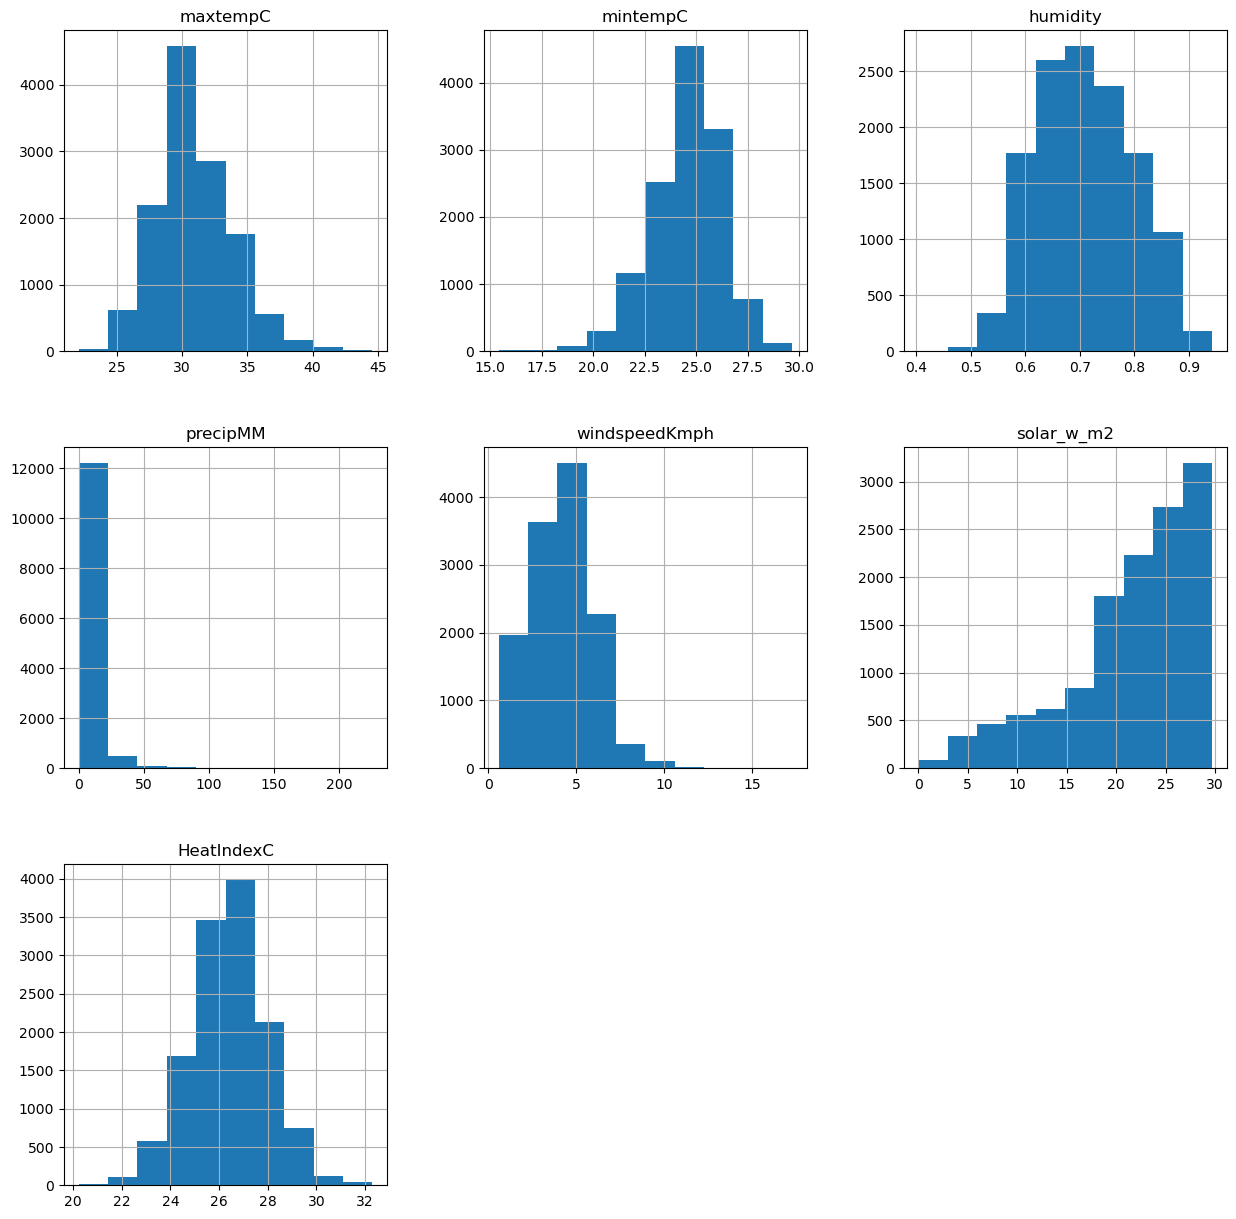

In [31]:
import matplotlib.pyplot as plt

weather_df_num.hist(bins=10,figsize=(15,15))
plt.show()

In [14]:
weather_y=weather_df_num.pop("tempC")
weather_x=weather_df_num

### Now our dataset is prepared and it is ready to be fed to the model for training.it’s time to split the dataset into training and testing.

In [15]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [16]:
train_X.shape

(10294, 7)

In [17]:
train_y.shape

(10294,)

### train_x has all the features except temperature and train_y has the corresponding temperature for those features. in supervised machine learning we first feed the model with input and associated output and then we check with a new input.

In [18]:
train_y.head()

1795    29.648
7091    29.876
2331    25.053
419     27.430
6132    27.734
Name: tempC, dtype: float64

# Random Forest Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [20]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

0.0021840753690758412

In [21]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 1.00


In [22]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

,Actual,Prediction,diff
12864,24.786,24.79,-0.004
1649,24.005,24.01,-0.005
11217,26.818,26.82,-0.002
9648,27.295,27.30,-0.005
2808,29.229,29.23,-0.001
...,...,...,...
9419,27.479,27.48,-0.001
5285,26.460,26.46,0.000
11785,25.508,25.51,-0.002
5758,29.490,29.49,0.000


In [23]:
from sklearn.metrics import r2_score

# Calculating R2-score for Random Forest Regression

In [24]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: 1.00


In [25]:
import pandas as pd

# Ensure DateTimeIndex (safe if you've already done this)
if not isinstance(weather_df_num.index, pd.DatetimeIndex):
    if 'Date' not in weather_df_num.columns and 'Date' in weather_df.columns:
        weather_df_num = weather_df[['Date']].join(weather_df_num, how='left')
    weather_df_num['Date'] = pd.to_datetime(weather_df_num['Date'], errors='coerce')
    weather_df_num = weather_df_num.dropna(subset=['Date']).set_index('Date').sort_index()

# See which years you actually have
year_counts = weather_df_num.index.year.value_counts().sort_index()
print("Available years (rows per year):", dict(year_counts))

# Pick a sensible year to plot: last “full-ish” year (>= 360 rows), else the latest year present
full_years = [int(y) for y, n in year_counts.items() if n >= 360]
year = full_years[-1] if full_years else int(year_counts.index.max())
print(f"Selected year: {year}")

# Plot that year
(weather_df_num
 .loc[f"{year}-01-01":f"{year}-12-31"]
 .resample('D').mean()
 .ffill()
 .plot(subplots=True, figsize=(25, 20)))


Available years (rows per year): {1979: 365, 1980: 366, 1981: 365, 1982: 365, 1983: 336, 1984: 366, 1985: 334, 1986: 357, 1987: 365, 1988: 366, 1989: 365, 1990: 365, 1991: 365, 1992: 366, 1993: 365, 1994: 365, 1995: 365, 1996: 337, 1997: 365, 1998: 365, 1999: 334, 2000: 366, 2001: 365, 2002: 365, 2003: 365, 2004: 366, 2005: 365, 2006: 365, 2007: 365, 2008: 366, 2009: 365, 2010: 365, 2011: 365, 2012: 366, 2013: 365, 2014: 212}
Selected year: 2013


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

In [26]:
import numpy as np
# 1) Are predictions literally the same as y?
print("All equal:", np.array_equal(prediction3, test_y))
print("Mean isclose:", np.mean(np.isclose(prediction3, test_y)))
print("Residual uniques (first 10):", np.unique(prediction3 - test_y)[:10])

# 2) Sanity on splits
#print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)
#print("Same indices train/test:", X_train.index.intersection(X_test.index).size)
# Build features and target
features = [c for c in ['maxtempC','mintempC','humidity','precipMM','windspeedKmph','solar_w_m2']
            if c in weather_df_num.columns]
X = weather_df_num[features].astype(float)
y = weather_df['tempC'].astype(float)   # or whatever your target column is

# Chronological 80/20 split (no shuffling)
split = int(len(X)*0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

# 3) No target in features
target = 'tempC'  # change if different
print("Target in X:", target in getattr(X_train, 'columns', []))

# 4) Time-aware split check (must be chronological)
assert X_test.index.min() > X_train.index.max(), "Test must come after train for time series"

# 5) If you used scalers/encoders, confirm fit only on train
# e.g., scaler.fit(X_train); scaler.transform(X_test)  (never fit on full data)


All equal: False
Mean isclose: 0.13053613053613053
Residual uniques (first 10): [-0.178 -0.064 -0.032 -0.022 -0.02  -0.018 -0.016 -0.016 -0.015 -0.014]
Target in X: False


In [27]:
# === Overfitting fix (compact): no leakage + time split + regularized RF ===
import numpy as np, pandas as pd, math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

try:
    base = weather_df.copy()
except NameError:
    try:
        base = df.copy()
    except NameError:
        base = pd.read_csv("/mnt/data/weatherdata_cleaned_dataset.csv")

if 'Date' in base.columns:
    base['Date'] = pd.to_datetime(base['Date'], errors='coerce')
    base = base.dropna(subset=['Date']).sort_values('Date').set_index('Date')

base = base.rename(columns={'Max Temperature(°C)':'maxtempC','Min Temperature(°C)':'mintempC','Average Temperature(°C)':'tempC','Precipitation(mm)':'precipMM','Wind(km/h)':'windspeedKmph','Relative Humidity':'humidity','Solar(W/m²)':'solar_w_m2'})

feats = [c for c in ['maxtempC','mintempC','humidity','precipMM','windspeedKmph','solar_w_m2'] if c in base.columns]
lag_days=[1,7]; roll_win=7
F = pd.DataFrame(index=base.index)
for c in feats:
    for L in lag_days:
        F[f"{c}_lag{L}"] = base[c].shift(L)
    F[f"{c}_roll{roll_win}"] = base[c].shift(1).rolling(roll_win, min_periods=3).mean()
doy = F.index.dayofyear
F['sin_doy'] = np.sin(2*np.pi*doy/365.25); F['cos_doy'] = np.cos(2*np.pi*doy/365.25)

y = base['tempC'].shift(-1)   # predict next day, prevents same-day leakage
full = F.join(y.rename('y')).dropna()
X = full.drop(columns=['y']); y = full['y']

split = int(len(full)*0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

rf = RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_leaf=8, min_samples_split=12, max_features='sqrt', n_jobs=-1, random_state=42).fit(X_train, y_train)
pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, pred); rmse = mean_squared_error(y_test, pred)**0.5; r2 = r2_score(y_test, pred)
y_naive = y_test.shift(1); m = ~y_naive.isna()
print(f"Test  -> MAE: {mae:.3f}  RMSE: {rmse:.3f}  R2: {r2:.3f}")
print(f"Naive -> MAE: {mean_absolute_error(y_test[m], y_naive[m]):.3f}  RMSE: {mean_squared_error(y_test[m], y_naive[m])**0.5:.3f}  R2: {r2_score(y_test[m], y_naive[m]):.3f}")

Test  -> MAE: 0.690  RMSE: 0.884  R2: 0.682
Naive -> MAE: 0.531  RMSE: 0.750  R2: 0.771


In [28]:
import numpy as np
import pandas as pd

# If your predictions are in `pred` (from the new cell)
prediction3 = pd.Series(np.round(pred, 2), index=y_test.index, name='Prediction')

# If you still have them in `prediction3` as a NumPy array, do:
# prediction3 = pd.Series(np.round(prediction3, 2), index=y_test.index, name='Prediction')

results = pd.DataFrame({
    'Actual': y_test.round(2),
    'Prediction': prediction3
})
results['diff'] = (results['Actual'] - results['Prediction']).round(2)

results  # display


,Actual,Prediction,diff
Date,,,
2007-07-16,24.38,25.08,-0.70
2007-07-17,24.14,24.98,-0.84
2007-07-18,23.91,25.18,-1.27
2007-07-19,25.56,25.63,-0.07
2007-07-20,24.25,25.22,-0.97
...,...,...,...
2014-07-26,24.85,26.15,-1.30
2014-07-27,24.79,25.91,-1.12
2014-07-28,24.48,26.10,-1.62
